# Problem Statement

Given is weighted locality routes graph with :
1. Vertices as Checkpoints. 
2. Edges as the routes.
3. Edge Weights as the Travel Time.(Randomly alloted to each edge)

The Goal-Based agent finds all paths between a source and destination using Depth First Search(DFS) and chooses one of the paths randomly.

# Importing the required modules

In [64]:
# Modules used for graph visualizations.
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Modules used for data handling
import random as r
import pandas as pd

# Reading the Adjacency Matrix of the Routes Graph

In [65]:
f = open(r"../data/routeGraph.txt","r")

# Conversion of Adjacency Matrix into a DataFrame

In [66]:
def separate(x):
    if x != '':
     return list(map(int,x.split(",")))

In [67]:
adjacencyMatrix = f.read().split("\n")
adjacencyMatrix = list(map(separate,adjacencyMatrix))

In [68]:
adjacencyMatrix = pd.DataFrame(adjacencyMatrix,index=range(1,16),columns=range(1,16))
adjacencyMatrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
4,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
8,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
9,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


# Finding all paths between a source and destination

In [69]:
allpaths = []

In [70]:
def findPaths(graph,source, destination,visited,path):
        visited.append(source)
        path.append(source)
        if source == destination:
            allpaths.append(path.copy())
        else:
            if source in graph:
             for i in graph[source]:
                if i not in visited:
                    findPaths(graph,i, destination, visited, path)
        x = path.pop()
        visited.remove(source)

# Agent Programming

## Environment Code

In [71]:
class Environment:
    def __init__(self) :
        self.env = dict()
    def createEnv(self):
        for j in adjacencyMatrix.index:
            for i in adjacencyMatrix.columns:
                if adjacencyMatrix.at[j,i] == 1:
                 if  j in self.env:
                    self.env[j].append(i)
                 else:
                    self.env[j] = [i]
    def showEnv(self):
        g = nx.Graph()
        for i in self.env:
            for j in self.env[i]:
               if (i,j) not in g.edges() or (j,i) not in g.edges():  
                g.add_edge(i,j)
                g[i][j]['weight'] = r.randint(a=1,b=10)
        return g

## Agent Code

In [72]:
class Agent:
    def __init__(self) :
        self.paths = None
    def getRoutes(self,env):
        findPaths(env,1,15,[],[])
        self.paths = allpaths.copy()
        print(r.choice(self.paths))

# Driver's Code

## Preparation of the Environment

In [73]:
e = Environment()
e.createEnv()
g = e.showEnv()
pos = nx.spring_layout(g)

## Visualising the Environment

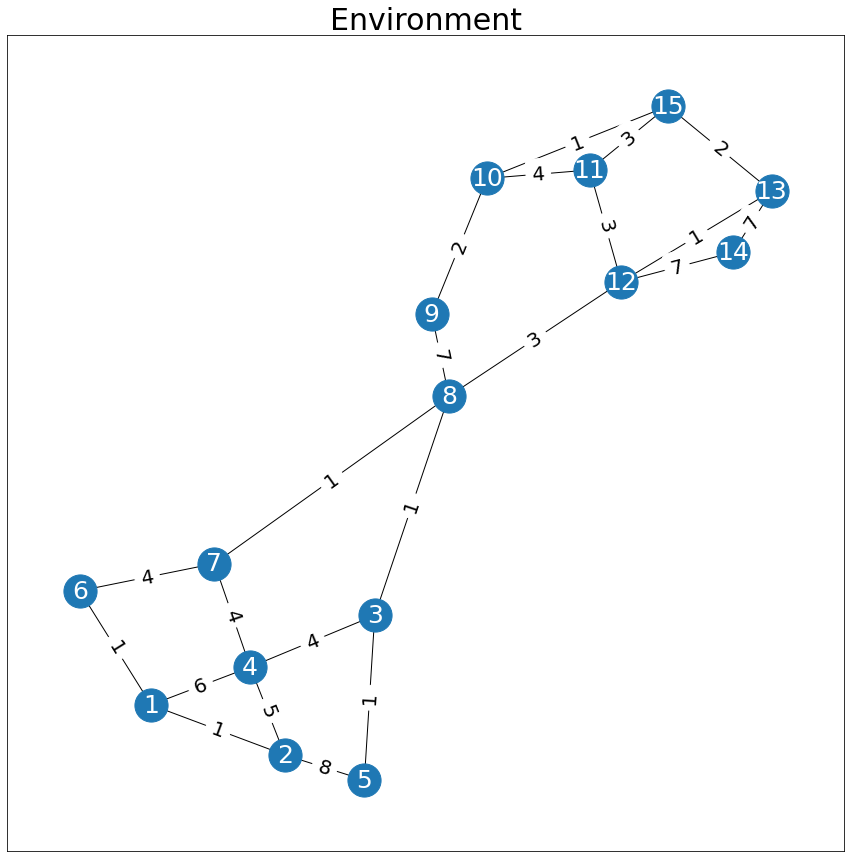

In [74]:

plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(g, pos=pos,node_size=1100)
nx.draw_networkx_edges(g, pos=pos)
nx.draw_networkx_labels(g, pos, font_size=25,font_color='w')
nx.draw_networkx_edge_labels(g,pos,edge_labels=nx.get_edge_attributes(g,'weight'),font_size=20)
plt.title("Environment",font={"size":30})
plt.show()


## Creating the Agent

In [75]:
a = Agent()
a.getRoutes(e.env)

[1, 6, 7, 4, 3, 8, 12, 11, 10, 15]
